In [1]:
using LinearAlgebra
using Distributions
using FileIO
import JLD2
using DataFrames
using CairoMakie

In [2]:
#NNATURALNESS 
using Revise
using Newtrinos
using Newtrinos.osc


osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.NNM(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg)

physics = (; osc);


experiments = (

   katrin= Newtrinos.katrin.configure(physics),
);

par= Newtrinos.get_params(experiments)

matrix=Newtrinos.osc.get_matrices(osc_cfg.flavour)(par)

[ Info: Precompiling Newtrinos [5b289081-bab5-45e8-97fc-86872f1653a0] (cache misses: include_dependency fsize change (2), wrong dep version loaded (2))
[ Info: Setting new default BAT context BATContext{Float64}(Random123.Philox4x{UInt64, 10}(0xcb9bc72f5b528961, 0x82639ec863f6a825, 0x3da271da1ee9826b, 0xc5a612e1a0d17ede, 0x801bf18b90d16232, 0xc5bd20b06f170d03, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0), HeterogeneousComputing.CPUnit(), BAT._NoADSelected())
[ Info: Loading Katrin data


(ComplexF64[-0.823559006035511 - 0.0im -0.5481473150987328 - 0.0im … -0.005481546035805803 - 0.0im -0.0007828688274756149 + 0.0012192459593020485im; 0.4124814108162824 + 0.07662837140482405im -0.5130567351441784 + 0.051002582374931445im … -0.005130635570415002 + 0.0005100326053458959im -0.007469152143127304 - 0.0im; … ; -0.0002891831078120794 - 5.372273757882172e-5im 0.00035969461232034675 - 3.575696962545894e-5im … -0.07239085289208125 + 0.007196319987461747im -0.10538622098586639 - 0.0im; 0.00026327162636680145 - 4.66610959552385e-5im -0.000460505719312328 - 3.105685722575349e-5im … 0.09267973620080566 + 0.0062503921541021005im -0.09153361856451647 - 0.0im], [0.0, 7.53e-5, 0.0024752999999999997, 0.08171625600906857, 0.08240687941681685, 0.10441878085899331, 0.24463360541891038, 0.24655099646771478, 0.3076630617682533, 0.4888649671195407  …  471.59516879785275, 386.0517463925226, 388.9587913428583, 481.6136104770638, 394.2702158290588, 397.23914585425166, 491.86639765322576, 1.0002666

In [3]:
using DelimitedFiles


eigen1= readdlm("/home/sofialon/Newtrinos.jl/src/experiments/katrin/eigen_data1.csv", ',')

eigen2= readdlm("/home/sofialon/Newtrinos.jl/src/experiments/katrin/eigen_data2.csv", ',')

Usector1= readdlm("/home/sofialon/Newtrinos.jl/src/experiments/katrin/Usector_data1.csv", ',')
Usector2= readdlm("/home/sofialon/Newtrinos.jl/src/experiments/katrin/Usector_data2.csv", ',');

In [4]:
function check_unitarity(U)
    n = size(U, 1)
    
    # Check row normalization
    for i in 1:n
        row_norm = sum(abs2, U[i, :])
        println("Row $i norm²: ", row_norm)
    end
    
    # Check column normalization  
    for j in 1:n
        col_norm = sum(abs2, U[:, j])
        println("Column $j norm²: ", col_norm)
    end
    
    # Check if U†U ≈ I
    println("||U†U - I||: ", norm(U' * U - I))
end

check_unitarity (generic function with 1 method)

In [5]:
for i in length(Usector1[1,:])
    norm=Vector{Float64}(undef, length(Usector1[1,:]))
    norm[i]= LinearAlgebra.norm(Usector1[i,:])
    println("Usector1 column $i norm: ", norm)
end

#the vectors are not normalized

Usector1 column 100 norm: [5.0e-324, 6.0e-323, 6.12863067057167e-310, 6.12863067057325e-310, 6.4e-323, 8.4e-323, 6.12863067057483e-310, 6.1286306705764e-310, 9.0e-323, 9.4e-323, 6.128630670578e-310, 6.12863067057957e-310, 1.0e-322, 1.3e-322, 6.12863067058116e-310, 6.12863067058274e-310, 1.33e-322, 1.63e-322, 6.1286306705843e-310, 6.1286306705859e-310, 1.7e-322, 1.83e-322, 6.1286306705875e-310, 6.12863067058906e-310, 1.9e-322, 2.6e-322, 6.12863067059064e-310, 6.1286306705922e-310, 2.67e-322, 2.7e-322, 6.1286306705938e-310, 6.1286306705954e-310, 2.77e-322, 2.8e-322, 6.12863067059697e-310, 6.12863067059855e-310, 2.87e-322, 3.06e-322, 6.12863067060013e-310, 6.1286306706017e-310, 3.1e-322, 3.6e-322, 6.1286306706033e-310, 6.12863067060487e-310, 3.66e-322, 3.66e-322, 6.12863067060645e-310, 6.12863067060803e-310, 3.7e-322, 4.15e-322, 6.1286306706096e-310, 6.1286306706112e-310, 6.1286339694314e-310, 6.1286238524555e-310, 6.1286306755898e-310, 6.1286306755914e-310, 6.12863067559296e-310, 6.12863

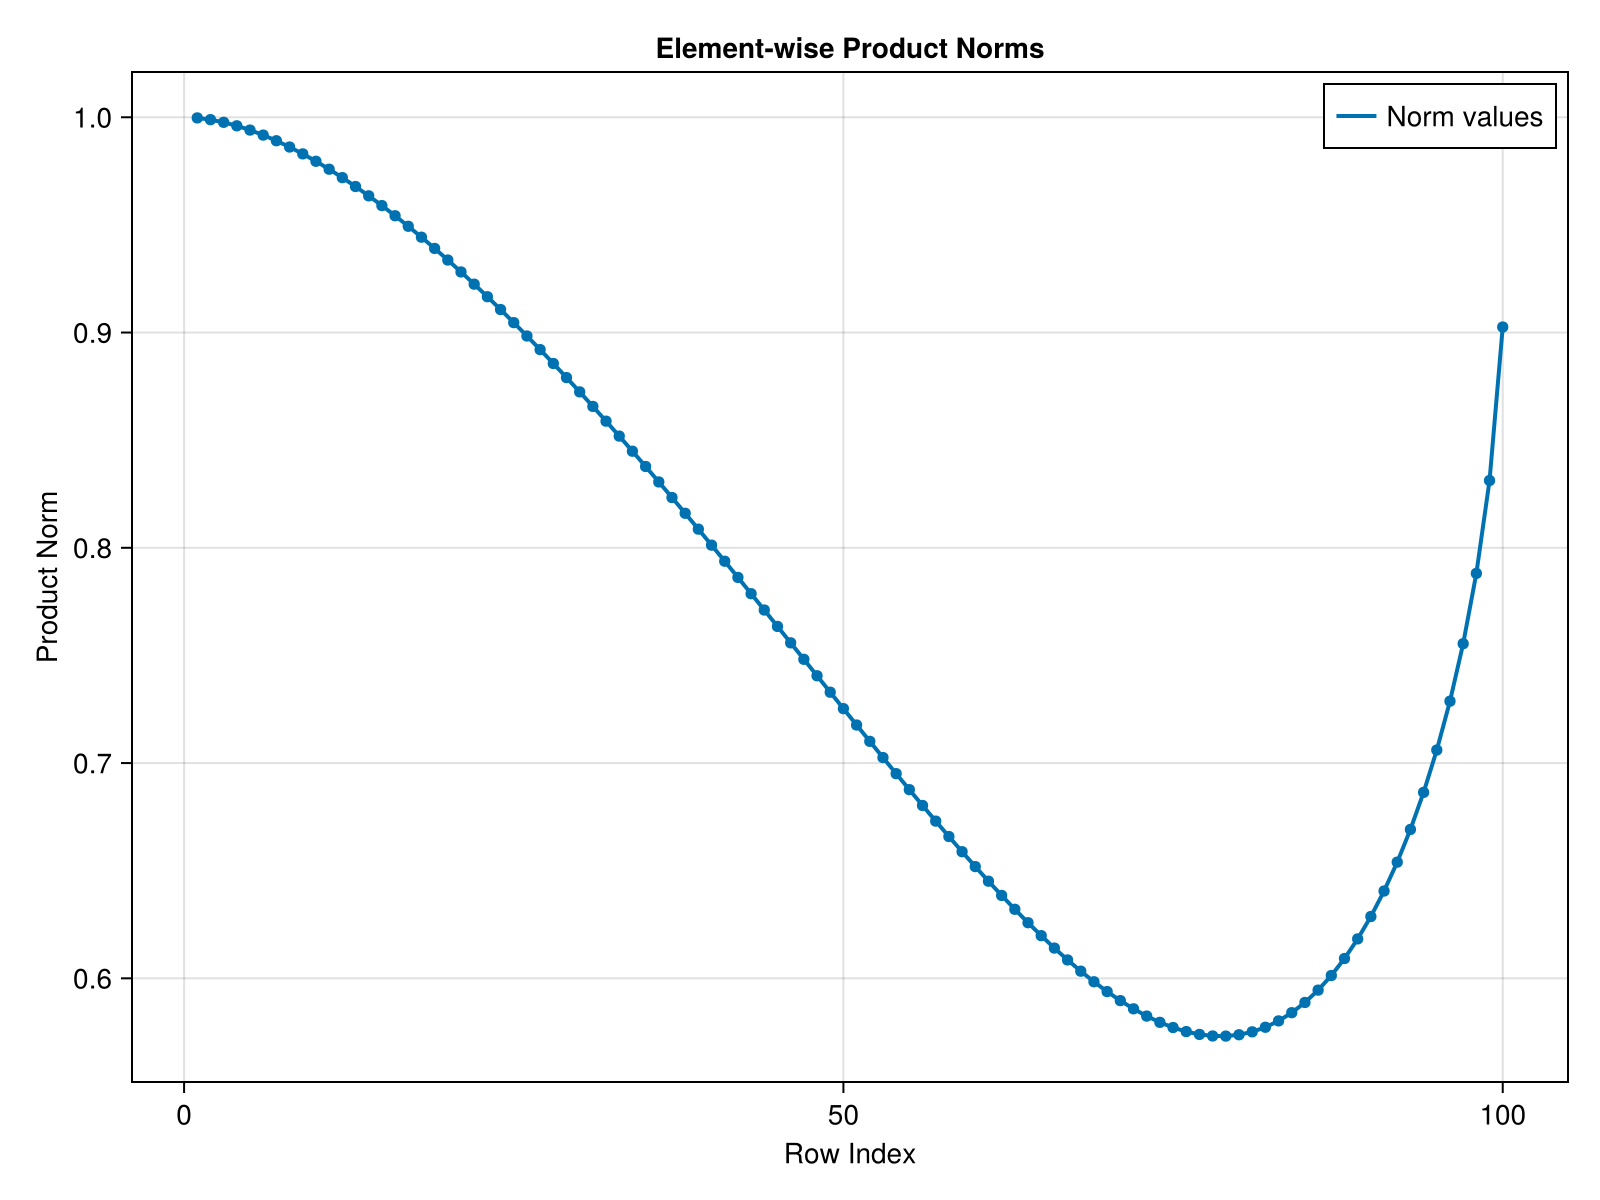

In [6]:

# Vectorized calculation
d=length(Usector1[:,1])
product = [norm(Usector1[i,:] .* Usector2[i,:]) for i in 1:d]

# Plot
fig = Figure(size = (800, 600))
ax = Axis(fig[1, 1], 
    xlabel = "Row Index", 
    ylabel = "Product Norm",
    title = "Element-wise Product Norms"
)

lines!(ax, 1:length(product), product, linewidth = 2, label = "Norm values")
scatter!(ax, 1:length(product), product, markersize = 8)

# Add legend if you want
axislegend(ax)

fig

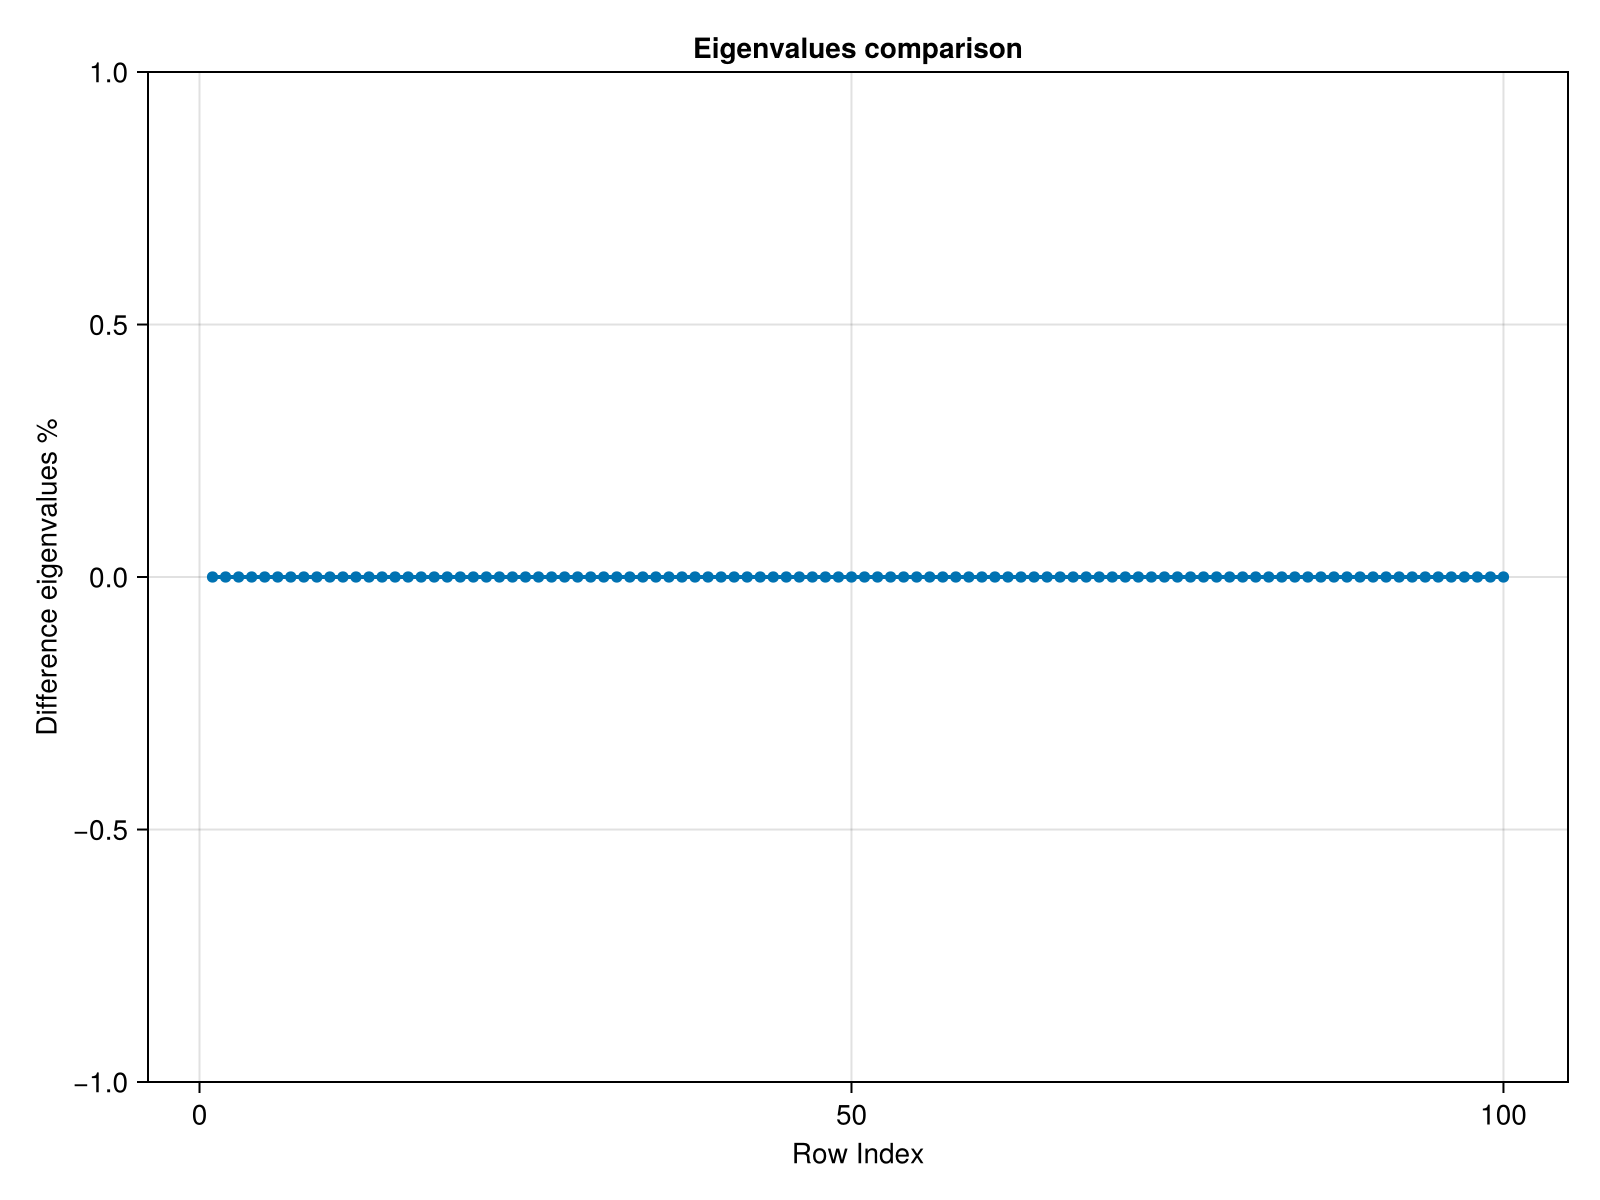

In [7]:

# Vectorized calculation
d=length(eigen1)
product = [(eigen1[i].- eigen2[i])./eigen1[i] for i in 1:d]*100


# Plot
fig = Figure(size = (800, 600))
ax = Axis(fig[1, 1], 
    xlabel = "Row Index", 
    ylabel = "Difference eigenvalues %",
    title = "Eigenvalues comparison"
)

lines!(ax, 1:length(product), product, linewidth = 2 ) #label = "Norm values"
scatter!(ax, 1:length(product), product, markersize = 8)



fig

In [8]:
f,h,Usector=Newtrinos.osc.get_matrices(osc_cfg.flavour)(par)

(ComplexF64[-0.823559006035511 - 0.0im -0.5481473150987328 - 0.0im … -0.005481546035805803 - 0.0im -0.0007828688274756149 + 0.0012192459593020485im; 0.4124814108162824 + 0.07662837140482405im -0.5130567351441784 + 0.051002582374931445im … -0.005130635570415002 + 0.0005100326053458959im -0.007469152143127304 - 0.0im; … ; -0.0002891831078120794 - 5.372273757882172e-5im 0.00035969461232034675 - 3.575696962545894e-5im … -0.07239085289208125 + 0.007196319987461747im -0.10538622098586639 - 0.0im; 0.00026327162636680145 - 4.66610959552385e-5im -0.000460505719312328 - 3.105685722575349e-5im … 0.09267973620080566 + 0.0062503921541021005im -0.09153361856451647 - 0.0im], [0.0, 7.53e-5, 0.0024752999999999997, 0.08171625600906857, 0.08240687941681685, 0.10441878085899331, 0.24463360541891038, 0.24655099646771478, 0.3076630617682533, 0.4888649671195407  …  471.59516879785275, 386.0517463925226, 388.9587913428583, 481.6136104770638, 394.2702158290588, 397.23914585425166, 491.86639765322576, 1.0002666

In [9]:
masses=0.1.+h

300-element Vector{Float64}:
   0.1
   0.1000753
   0.1024753
   0.18171625600906857
   0.18240687941681685
   0.20441878085899332
   0.3446336054189104
   0.3465509964677148
   0.4076630617682533
   0.5888649671195407
   0.5926214203219509
   0.7123490124306406
   0.914345999642497
   ⋮
 378.12112454037396
 380.967698908163
 471.6951687978528
 386.1517463925226
 389.05879134285834
 481.7136104770638
 394.37021582905885
 397.3391458542517
 491.9663976532258
   1.0002666822305828e10
   1.0077986903477114e10
   1.2478626940808912e10

In [16]:
using LinearAlgebra

U_original = copy(Usector)  # Original PMNS matrix
U_modified= copy(Usector)
zero_positions = []  # To store positions of zero masses

for i in 1:length(masses)
    if masses[i] == 0
    # Handle zero masses
    zero_positions = [1,(i)]
    U_modified[zero_positions] .= 0 
    end
end    

# Your iterative approach (preserving zeros)
function restore_unitarity_iterative(U_modified, zero_positions; max_iter=1000, tol=1e-12)
    U = copy(U_modified)
    n = size(U, 1)
    
    for iter in 1:max_iter
        U_old = copy(U)
        
        # Normalize rows
        for i in 1:n
            row_norm = norm(U[i, :])
            if row_norm > tol
                U[i, :] .*= (1.0 / row_norm)
            end
        end
        
        # Ensure zeros stay zero
        for (i, j) in zero_positions
            U[i, j] = 0
        end
        
        # Normalize columns  
        for j in 1:n
            col_norm = norm(U[:, j])
            if col_norm > tol
                U[:, j] .*= (1.0 / col_norm)
            end
        end
        
        # Ensure zeros stay zero
        for (i, j) in zero_positions
            U[i, j] = 0
        end
        
        # Check convergence
        if norm(U - U_old) < tol
            println("Converged after $iter iterations")
            break
        end
        
        if iter == max_iter
            println("Warning: Did not converge after $max_iter iterations")
        end
    end
    
    return U
end

# Simple QR approach (doesn't preserve zeros)
function restore_unitarity_qr(U_modified)
    Q, R = qr(U_modified)
    return Matrix(Q)
end


restore_unitarity_qr (generic function with 1 method)

In [17]:
Uiter = restore_unitarity_iterative(U_modified, zero_positions)

Converged after 1 iterations


100×100 Matrix{Float64}:
 -0.999854     -0.00809852   0.005092    …  -0.00014823   -0.00999868
  0.00856239   -0.999446     0.0174404      -0.000259367  -0.0173183
  0.00551337    0.0186318    0.99883        -0.000338302  -0.0223578
  0.00434543    0.0109437   -0.0278984      -0.000404463  -0.0264542
  0.00369393    0.00825295  -0.0156324      -0.000463457  -0.0299963
  0.00326623    0.00683484  -0.0114769   …  -0.000517834  -0.0331622
  0.00295848    0.00593996  -0.00933942     -0.000569012  -0.0360512
  0.00272361    0.00531459  -0.00801642     -0.000617877  -0.0387253
  0.00253685    0.00484791  -0.00710629     -0.000665026  -0.0412263
  0.00238377    0.00448337  -0.0064359      -0.000710888  -0.043584
  0.00225536    0.00418888  -0.00591794  …  -0.000755785  -0.0458206
  0.00214565    0.00394481  -0.00550342     -0.000799967  -0.047953
  0.0020505     0.00373838  -0.00516262     -0.000843634  -0.0499946
  ⋮                                      ⋱                
  0.000743739   0.00

In [18]:
unit_iter=check_unitarity(Uiter)


Row 1 norm²: 1.0000000000000004
Row 2 norm²: 1.0000000000000002
Row 3 norm²: 1.0
Row 4 norm²: 1.0000000000000002
Row 5 norm²: 1.0000000000000002
Row 6 norm²: 0.9999999999999998
Row 7 norm²: 0.9999999999999998
Row 8 norm²: 1.0000000000000004
Row 9 norm²: 1.0
Row 10 norm²: 0.9999999999999999
Row 11 norm²: 1.0000000000000004
Row 12 norm²: 0.9999999999999998
Row 13 norm²: 1.0000000000000007
Row 14 norm²: 0.9999999999999998
Row 15 norm²: 0.9999999999999996
Row 16 norm²: 1.0000000000000002
Row 17 norm²: 1.000000000000001
Row 18 norm²: 0.9999999999999997
Row 19 norm²: 0.9999999999999992
Row 20 norm²: 1.0000000000000007
Row 21 norm²: 1.0000000000000007
Row 22 norm²: 0.9999999999999976
Row 23 norm²: 1.0000000000000038
Row 24 norm²: 0.9999999999999974
Row 25 norm²: 1.000000000000001
Row 26 norm²: 0.999999999999999
Row 27 norm²: 1.0000000000000002
Row 28 norm²: 0.9999999999999994
Row 29 norm²: 1.0000000000000007
Row 30 norm²: 1.0000000000000022
Row 31 norm²: 0.9999999999999963
Row 32 norm²: 1.000

In [19]:
Uauto= restore_unitarity_qr(U_modified)

100×100 Matrix{Float64}:
 -0.999854     -0.00809852  -0.005092    …  -0.00014823   0.00999868
  0.00856239   -0.999446    -0.0174404      -0.000259367  0.0173183
  0.00551337    0.0186318   -0.99883        -0.000338302  0.0223578
  0.00434543    0.0109437    0.0278984      -0.000404463  0.0264542
  0.00369393    0.00825295   0.0156324      -0.000463457  0.0299963
  0.00326623    0.00683484   0.0114769   …  -0.000517834  0.0331622
  0.00295848    0.00593996   0.00933942     -0.000569012  0.0360512
  0.00272361    0.00531459   0.00801642     -0.000617877  0.0387253
  0.00253685    0.00484791   0.00710629     -0.000665026  0.0412263
  0.00238377    0.00448337   0.0064359      -0.000710888  0.043584
  0.00225536    0.00418888   0.00591794  …  -0.000755785  0.0458206
  0.00214565    0.00394481   0.00550342     -0.000799967  0.047953
  0.0020505     0.00373838   0.00516262     -0.000843634  0.0499946
  ⋮                                      ⋱                
  0.000743739   0.00125627   0.00

In [20]:
unit_auto=check_unitarity(Uauto)

Row 1 norm²: 1.0000000000000002
Row 2 norm²: 0.9999999999999999
Row 3 norm²: 1.0000000000000002
Row 4 norm²: 1.0
Row 5 norm²: 1.0
Row 6 norm²: 0.9999999999999999
Row 7 norm²: 1.0000000000000004
Row 8 norm²: 1.0000000000000002
Row 9 norm²: 1.0000000000000002
Row 10 norm²: 1.0
Row 11 norm²: 1.0000000000000002
Row 12 norm²: 1.0000000000000009
Row 13 norm²: 1.0000000000000002
Row 14 norm²: 1.0
Row 15 norm²: 0.9999999999999998
Row 16 norm²: 1.0000000000000002
Row 17 norm²: 0.9999999999999998
Row 18 norm²: 1.0000000000000002
Row 19 norm²: 1.0
Row 20 norm²: 1.0000000000000002
Row 21 norm²: 0.9999999999999996
Row 22 norm²: 1.0000000000000007
Row 23 norm²: 0.9999999999999998
Row 24 norm²: 0.9999999999999999
Row 25 norm²: 1.0
Row 26 norm²: 1.0000000000000002
Row 27 norm²: 0.9999999999999998
Row 28 norm²: 0.9999999999999997
Row 29 norm²: 1.0
Row 30 norm²: 1.0000000000000004
Row 31 norm²: 1.0
Row 32 norm²: 1.0000000000000004
Row 33 norm²: 0.9999999999999996
Row 34 norm²: 1.0000000000000002
Row 35 

In [ ]:
using LinearAlgebra
using Plots
using Random
using Statistics

function analyze_eigenvector_consistency()
    """
    Demonstrate and analyze eigenvector sign/phase ambiguity in Julia
    """
    
    # Create a test matrix (you can replace this with your actual matrix)
    Random.seed!(42)  # For reproducibility
    n = 100
    # Create a symmetric matrix (typical for eigenvalue problems)
    A = randn(n, n)
    A = A + A'  # Make symmetric
    
    # Run diagonalization twice
    eigenvals1, eigenvecs1 = eigen(A)
    eigenvals2, eigenvecs2 = eigen(A)
    
    # Calculate the "norm" (element-wise product) of corresponding eigenvectors
    norms = Float64[]
    signed_norms = Float64[]
    
    for i in 1:n
        # Dot product of corresponding eigenvectors
        norm_val = dot(eigenvecs1[:, i], eigenvecs2[:, i])
        push!(signed_norms, norm_val)
        push!(norms, abs(norm_val))  # Take absolute value
    end
    
    # Create plots
    p1 = plot(1:n, norms, 
             seriestype=:scatter, 
             markersize=3, 
             xlabel="Eigenvector Index", 
             ylabel="|⟨v₁|v₂⟩|",
             title="Absolute Dot Product of Corresponding Eigenvectors",
             grid=true,
             label="")
    
    p2 = plot(1:n, signed_norms, 
             seriestype=:scatter, 
             markersize=3, 
             color=:red,
             xlabel="Eigenvector Index", 
             ylabel="⟨v₁|v₂⟩",
             title="Signed Dot Product of Corresponding Eigenvectors",
             grid=true,
             label="")
    hline!([0], color=:black, linestyle=:dash, alpha=0.5, label="")
    
    plot(p1, p2, layout=(1,2), size=(800, 400))
    
    # Statistics
    println("Eigenvector Consistency Analysis:")
    println("Number of eigenvectors: $n")
    println("Eigenvalues identical: $(isapprox(eigenvals1, eigenvals2))")
    println("Min |⟨v₁|v₂⟩|: $(minimum(norms))")
    println("Max |⟨v₁|v₂⟩|: $(maximum(norms))")
    println("Mean |⟨v₁|v₂⟩|: $(mean(norms))")
    
    # Count how many are close to 1 vs -1
    close_to_plus_one = count(x -> x > 0.99, signed_norms)
    close_to_minus_one = count(x -> x < -0.99, signed_norms)
    
    println("Eigenvectors with same sign: $close_to_plus_one")
    println("Eigenvectors with opposite sign: $close_to_minus_one")
    
    return eigenvals1, eigenvecs1, eigenvals2, eigenvecs2
end

function analyze_your_pattern()
    """
    Analyze the specific U-shaped pattern you're seeing
    """
    # Simulate your pattern - starts high, dips to minimum around middle, rises again
    n_points = 100
    x = 1:n_points
    
    # Create a pattern similar to yours
    pattern = 0.6 .+ 0.4 .* ((x .- 50) ./ 50).^2
    
    plot(x, pattern, 
         linewidth=2, 
         xlabel="Eigenvector Index", 
         ylabel="|⟨v₁|v₂⟩|",
         title="U-shaped Pattern: Sign Consistency vs Eigenvector Index",
         grid=true,
         label="Expected Pattern",
         size=(600, 400))
    
    println("\nPossible explanations for your U-shaped pattern:")
    println("1. Middle eigenvectors are more sensitive to numerical noise")
    println("2. Algorithm treats boundary vs interior modes differently")
    println("3. Conditioning issues around specific eigenvalue ranges")
    println("4. Your matrix has special structure (e.g., band matrix, discretized operator)")
end

function fix_eigenvector_signs(eigenvecs1, eigenvecs2)
    """
    Fix eigenvector signs to ensure consistency
    """
    n = size(eigenvecs1, 2)
    eigenvecs2_corrected = copy(eigenvecs2)
    
    for i in 1:n
        # Check dot product
        dot_product = dot(eigenvecs1[:, i], eigenvecs2[:, i])
        
        # If negative, flip the sign of the second eigenvector
        if dot_product < 0
            eigenvecs2_corrected[:, i] .*= -1
        end
    end
    
    return eigenvecs2_corrected
end

function investigate_matrix_properties(A)
    """
    Investigate properties of your matrix that might cause the pattern
    """
    n = size(A, 1)
    
    # Check if matrix is symmetric/Hermitian
    is_symmetric = ishermitian(A)
    println("Matrix is symmetric/Hermitian: $is_symmetric")
    
    # Check condition number
    cond_num = cond(A)
    println("Condition number: $cond_num")
    
    # Eigenvalue analysis
    eigenvals = eigvals(A)
    
    # Plot eigenvalues
    p1 = plot(1:n, real.(eigenvals), 
             seriestype=:scatter,
             xlabel="Index", 
             ylabel="Eigenvalue",
             title="Eigenvalue Spectrum",
             grid=true,
             label="")
    
    # Check for degeneracies (repeated eigenvalues)
    eigenval_diffs = diff(sort(real.(eigenvals)))
    min_gap = minimum(eigenval_diffs)
    println("Minimum eigenvalue gap: $min_gap")
    
    # Plot eigenvalue gaps
    p2 = plot(1:length(eigenval_diffs), eigenval_diffs,
             seriestype=:scatter,
             xlabel="Index", 
             ylabel="Eigenvalue Gap",
             title="Gaps Between Consecutive Eigenvalues",
             grid=true,
             yscale=:log10,
             label="")
    
    plot(p1, p2, layout=(1,2), size=(800, 400))
    
    return eigenvals
end

# Run the analysis
println("Running eigenvector consistency analysis...")
eigenvals1, eigenvecs1, eigenvals2, eigenvecs2 = analyze_eigenvector_consistency()

println("\n" * "="^50)
analyze_your_pattern()

# Example of how to use with your actual matrix:
println("\n" * "="^50)
println("To use with your actual matrix A:")
println("eigenvals1, eigenvecs1 = eigen(A)")
println("eigenvals2, eigenvecs2 = eigen(A)")
println("")
println("# Calculate norm values like in your plot:")
println("norm_values = [abs(dot(eigenvecs1[:, i], eigenvecs2[:, i])) for i in 1:size(A,1)]")
println("plot(1:length(norm_values), norm_values, xlabel=\"Index\", ylabel=\"Product Norm\")")
println("")
println("# Fix sign consistency:")
println("eigenvecs2_fixed = fix_eigenvector_signs(eigenvecs1, eigenvecs2)")
println("")
println("# Investigate matrix properties:")
println("investigate_matrix_properties(A)")

In [ ]:
# With your actual matrix A
eigenvals1, eigenvecs1 = eigen(A)
eigenvals2, eigenvecs2 = eigen(A)

# Calculate the norm values (like in your plot)
norm_values = [abs(dot(eigenvecs1[:, i], eigenvecs2[:, i])) for i in 1:size(A,1)]

# Plot to reproduce your figure
plot(1:length(norm_values), norm_values, 
     seriestype=:line,
     marker=:circle,
     markersize=2,
     xlabel="Eigenvector Index", 
     ylabel="Product Norm",
     title="Norm values",
     grid=true,
     label="Norm values")